In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [457]:
sample = pd.read_csv ("C:\\Users\\bubbl\\Desktop\\Data\\sample_submission.csv")
test = pd.read_csv("C:\\Users\\bubbl\\Desktop\\Data\\test.csv")
train = pd.read_csv("C:\\Users\\bubbl\\Desktop\\Data\\train.csv")

In [458]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,37061,Male,19.0,0,0,No,Private,Rural,92.61,16.8,never smoked
1,42333,Male,53.0,0,0,Yes,Govt_job,Urban,94.03,26.5,NaN
2,58964,Female,51.0,0,0,Yes,Private,Rural,127.22,31.0,smokes
3,34063,Female,17.0,0,0,No,Private,Rural,112.15,19.8,NaN
4,43682,Female,41.0,0,0,Yes,Govt_job,Urban,112.17,27.5,never smoked


In [459]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [460]:
sample.head()

,id,stroke
0,37061,0.5
1,42333,0.5
2,58964,0.5
3,34063,0.5
4,43682,0.5


In [461]:
feautures_list = ['age', 'avg_glucose_level', 'bmi']

In [462]:
train.shape

(30001, 12)

In [463]:
np.sum(pd.isnull(train['bmi']))# считаем количество неопределенных значений

1017

In [464]:
mean_bmi = train['bmi'].mean()
train['bmi'] = train['bmi'].fillna(mean_bmi)
test['bmi'] = test['bmi'].fillna(mean_bmi)# заменяем их средними значениями в тестовой и обучающей выборках

In [465]:
train_part1 = train.loc[0:15000, : ].copy()
train_part2 = train.loc[15000:, : ].copy() #делим датасет на две равные части

In [466]:
from sklearn.linear_model import LogisticRegression

In [467]:
log_reg_1 = LogisticRegression(random_state=0, solver='lbfgs',
                     )
log_reg_1.fit(X = train_part1.loc[:,feautures_list ], y= train_part1.loc[:, 'stroke'])
# создаем логистическую функцию и тренируем модель на первой половине выборки, то есть проводим кросс-валидацию, для того чтобы
#избежать переобучения модели


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [468]:
prediction_on_part2 = log_reg_1.predict_proba(X = train_part2.loc[:,feautures_list ] )[:,1]
#строим предсказание значения stroke на второй половине обучающей выборки

In [469]:
log_reg_1.intercept_ # свободный член, это гиперпараметр

array([-8.78222284])

In [470]:
log_reg_1.coef_ # ну это коэффициенты при параметрах заданных в features, ну это тоже гиперпараметры

array([[ 0.07224691,  0.00498493, -0.0002981 ]])

In [471]:
t=np.arange(-0.33224691,0.57224691,0.05)

In [472]:
t

array([-0.33224691, -0.28224691, -0.23224691, -0.18224691, -0.13224691,
       -0.08224691, -0.03224691,  0.01775309,  0.06775309,  0.11775309,
        0.16775309,  0.21775309,  0.26775309,  0.31775309,  0.36775309,
        0.41775309,  0.46775309,  0.51775309,  0.56775309])

In [473]:
intercept=np.arange(-88.78222284,82.78222284,10) # взял какие-то интерсепты с шагом 10, включая исходное значение в модели

In [474]:
intercept

array([-88.78222284, -78.78222284, -68.78222284, -58.78222284,
       -48.78222284, -38.78222284, -28.78222284, -18.78222284,
        -8.78222284,   1.21777716,  11.21777716,  21.21777716,
        31.21777716,  41.21777716,  51.21777716,  61.21777716,
        71.21777716,  81.21777716])

In [475]:
len(intercept)

18

In [476]:
from sklearn.metrics import accuracy_score
score=[]
for i in range(len(intercept)):
    log_reg_1.intercept_=intercept[i]
    prediction_on_part2 = log_reg_1.predict_proba(X = train_part2.loc[:,feautures_list ] )[:,1]
    score.append(accuracy_score(train_part2['stroke']  ,
                      (prediction_on_part2 > train['stroke'].mean())*1))
    

In [477]:
score # ну здесь по идее он выводит зависимость метрики от интерсепта, то, что равно 0.74 это при исходном значении интерсепта

[0.9813345776948204,
 0.9813345776948204,
 0.9813345776948204,
 0.9813345776948204,
 0.9813345776948204,
 0.9813345776948204,
 0.9813345776948204,
 0.9813345776948204,
 0.7400173321778548,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653]

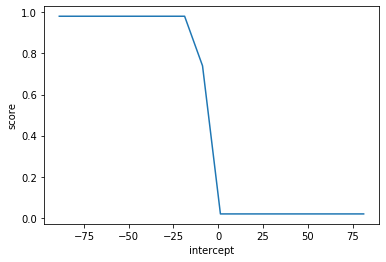

In [478]:
plt.plot(intercept,score)
plt.ylabel('score')
plt.xlabel('intercept')
plt.show()         
# ну странно как-то получается, где-то в районе нуля начинается скачкообразное увеличение, где-то в районе -20 выходит на максимальное значение

In [479]:
# ну можно примерно тоже самое проделать с оставшимися коэффициентами, ну я возьму , допустим, первый

In [480]:
score=[]
for i in range(len(t)):
    log_reg_1.coef_=np.array([[ t[i],  0.00498493, -0.0002981 ]])
    print(log_reg_1.coef_)
    prediction_on_part2 = log_reg_1.predict_proba(X = train_part2.loc[:,feautures_list ] )[:,1]
    score.append(accuracy_score(train_part2['stroke']  ,
                      (prediction_on_part2 > train['stroke'].mean())*1))


[[-3.3224691e-01  4.9849300e-03 -2.9810000e-04]]
[[-0.28224691  0.00498493 -0.0002981 ]]
[[-0.23224691  0.00498493 -0.0002981 ]]
[[-0.18224691  0.00498493 -0.0002981 ]]
[[-0.13224691  0.00498493 -0.0002981 ]]
[[-0.08224691  0.00498493 -0.0002981 ]]
[[-0.03224691  0.00498493 -0.0002981 ]]
[[ 0.01775309  0.00498493 -0.0002981 ]]
[[ 0.06775309  0.00498493 -0.0002981 ]]
[[ 0.11775309  0.00498493 -0.0002981 ]]
[[ 0.16775309  0.00498493 -0.0002981 ]]
[[ 0.21775309  0.00498493 -0.0002981 ]]
[[ 0.26775309  0.00498493 -0.0002981 ]]
[[ 3.1775309e-01  4.9849300e-03 -2.9810000e-04]]
[[ 3.6775309e-01  4.9849300e-03 -2.9810000e-04]]
[[ 4.1775309e-01  4.9849300e-03 -2.9810000e-04]]
[[ 4.6775309e-01  4.9849300e-03 -2.9810000e-04]]
[[ 5.1775309e-01  4.9849300e-03 -2.9810000e-04]]
[[ 5.6775309e-01  4.9849300e-03 -2.9810000e-04]]


In [481]:
t

array([-0.33224691, -0.28224691, -0.23224691, -0.18224691, -0.13224691,
       -0.08224691, -0.03224691,  0.01775309,  0.06775309,  0.11775309,
        0.16775309,  0.21775309,  0.26775309,  0.31775309,  0.36775309,
        0.41775309,  0.46775309,  0.51775309,  0.56775309])

In [482]:
score # тут почему то зависимости от первого параметра нет

[0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653,
 0.018665422305179653]

In [483]:
log_reg_2 = LogisticRegression(random_state=0, solver='lbfgs',
                     )
log_reg_2.fit(X = train_part2.loc[:,feautures_list ], y= train_part2.loc[:, 'stroke'])
# создаем модель логистической регрессии для второй половины обучающей выборки, то есть проводим кросс-валидацию

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [484]:
prediction_on_part1 = log_reg_2.predict_proba(X = train_part1.loc[:,feautures_list ] )[:,1]

In [485]:
accuracy_score(train_part1['stroke']  ,
                      (prediction_on_part1 > train['stroke'].mean())*1)

0.7172855142990467

In [486]:
# видим, что в первом случае значение выше, поэтому выбираем первую модель и соответствующие ей гиперпараметры
score=[accuracy_score(train_part2['stroke']  ,
                      (prediction_on_part2 > train['stroke'].mean())*1),accuracy_score(train_part1['stroke']  ,
                      (prediction_on_part1 > train['stroke'].mean())*1)]

In [487]:
score

[0.018665422305179653, 0.7172855142990467]

In [488]:
np.mean(score)

0.3679754683021132

In [489]:
# можно features менять и в зависимости от значения метрики смотреть какие параметры оказывают наибольшее влияние на результат
# предварительно заменяем все категориальные переменные на числовые

In [490]:
for i in train['work_type'].unique():
    print(i)
    train['work_type_is_{}'.format(i)] = (train['work_type'] == i)*1
    test['work_type_is_{}'.format(i)] = (test['work_type'] == i)*1

children
Private
Never_worked
Self-employed
Govt_job


In [491]:
train['smoking_status'] = train['smoking_status'].fillna('nan')
test['smoking_status'] = test['smoking_status'].fillna('nan')

In [492]:
K=train.groupby(['smoking_status']).size() # тут поменял таргет энкодинг на гладкий

In [493]:
meanstroke=train.groupby('smoking_status')['stroke'].mean()

In [494]:
globalmeanstroke=train["stroke"].mean()

In [495]:
f=(meanstroke*K+globalmeanstroke*10)/(K+10)
smoking_status_smooth_target_enc_dict=f.to_dict()

In [496]:
train['smoking_status_smooth_target_enc'] = train['smoking_status'].replace(smoking_status_smooth_target_enc_dict)
test['smoking_status_smooth_target_enc'] = test['smoking_status'].replace(smoking_status_smooth_target_enc_dict)

In [497]:
train['ever_married'] = train['ever_married'].replace({'Yes':1, 'No':0 })
test['ever_married'] = test['ever_married'].replace({'Yes':1, 'No':0 })

In [498]:
train['Residence_type'] = train['Residence_type'].replace({'Urban':1, 'Rural':0 })
test['Residence_type'] = test['Residence_type'].replace({'Urban':1, 'Rural':0 })

In [499]:
train['gender'].value_counts()

Female    17676
Male      12315
Other        10
Name: gender, dtype: int64

In [500]:
for i in train['smoking_status'].unique():
    print(i)
    train['smoking_status_is_{}'.format(i)] = (train['smoking_status'] == i)*1
    test['smoking_status_is_{}'.format(i)] = (test['smoking_status'] == i)*1

nan
never smoked
formerly smoked
smokes


In [501]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_is_children,work_type_is_Private,work_type_is_Never_worked,work_type_is_Self-employed,work_type_is_Govt_job,smoking_status_smooth_target_enc,smoking_status_is_nan,smoking_status_is_never smoked,smoking_status_is_formerly smoked,smoking_status_is_smokes
0,30669,Male,3.0,0,0,0,children,0,95.12,18.0,...,1,0,0,0,0,0.011450,1,0,0,0
1,30468,Male,58.0,1,0,1,Private,1,87.96,39.2,...,0,1,0,0,0,0.017240,0,1,0,0
2,16523,Female,8.0,0,0,0,Private,1,110.89,17.6,...,0,1,0,0,0,0.011450,1,0,0,0
3,56543,Female,70.0,0,0,1,Private,0,69.04,35.9,...,0,1,0,0,0,0.027764,0,0,1,0
4,46136,Male,14.0,0,0,0,Never_worked,0,161.28,19.1,...,0,0,1,0,0,0.011450,1,0,0,0


In [502]:
gender_target_enc_dict = (train.groupby(['gender'])['stroke'].agg(['mean'])).to_dict()['mean']

train['gender_target_enc'] = train['gender'].replace(gender_target_enc_dict)
test['gender_target_enc'] = test['gender'].replace(gender_target_enc_dict)

In [503]:
all_features = [ 'age', 'hypertension', 'heart_disease', 'ever_married',
        'Residence_type', 'avg_glucose_level', 'bmi',
         'work_type_is_children',
       'work_type_is_Private', 'work_type_is_Never_worked',
       'work_type_is_Self-employed', 'work_type_is_Govt_job',
       'smoking_status_target_enc', 'smoking_status_is_nan',
       'smoking_status_is_never smoked', 'smoking_status_is_formerly smoked',
       'smoking_status_is_smokes', 'gender_target_enc']

In [504]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score 
# вводим метрику roc auc и записываем для нее функцию вычисления метрики с использованием модели log_reg_1, кросс-валидации

In [505]:
def my_cross_validation_for_roc_auc( log_reg_1, X, y ,cv=5):
    X = np.array(X.copy())
    y = np.array(y.copy())
    kf = KFold(n_splits=cv)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        log_reg_1.fit(X_train, y_train)
        prediction_on_this_fold = log_reg_1.predict_proba(X_test)[:,1]
        
        score = roc_auc_score(y_score=prediction_on_this_fold, y_true=y_test)
        scores.append(score)
        
    return scores
# здесь вычисляются метрики для выборки разбитой равномерно на пять частей, используем кросс-валидацию

In [506]:
features = [  'age',
            'hypertension' , 'heart_disease' , 'ever_married' ,
            'avg_glucose_level' ,'bmi']

In [507]:
scores = my_cross_validation_for_roc_auc(log_reg_1, train[features] , train['stroke'])

D:\JyPyter\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\JyPyter\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [508]:
scores
# список вычисленных метрик для каждого случая

[0.8420497759704808,
 0.848366647141066,
 0.8471269478319783,
 0.8541358001635146,
 0.8451441762700042]

In [509]:
np.mean(scores)# среднее значение по всем разбиениям

0.8473646694754088

In [510]:
all_features = [ 'age', 'hypertension', 'heart_disease', 'ever_married',
        'Residence_type', 'avg_glucose_level', 'bmi',
         'work_type_is_children',
       'work_type_is_Private', 'work_type_is_Never_worked',
       'work_type_is_Self-employed', 'work_type_is_Govt_job']
# выбираем все числовые фичи

In [511]:
features_scores = {}
for f in all_features:
    scores = my_cross_validation_for_roc_auc(log_reg_1, train[[f]] , train['stroke'])
    print(f,  np.mean(scores))
    features_scores[f] = np.mean(scores)
    # считаем для них метрику

age 0.8366076869311634
hypertension 0.581615320246325
heart_disease 0.5818777239077606
ever_married 0.6259899654630761
Residence_type 0.49321198951765294
avg_glucose_level 0.6139074419876318
bmi 0.5628027539558931
work_type_is_children 0.5689884334400628
work_type_is_Private 0.48643144589553095
work_type_is_Never_worked 0.5019511976545372
work_type_is_Self-employed 0.5634987850302702
work_type_is_Govt_job 0.4889896401849564


In [512]:
scores = my_cross_validation_for_roc_auc(log_reg_1, train[all_features] , train['stroke'])

D:\JyPyter\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\JyPyter\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\JyPyter\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\JyPyter\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\JyPyter\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [513]:
np.mean(scores)

0.846582333271612

In [514]:
# средние значение метрики для параметров без учета типа занятости выше, значит эти параметры несущественны

In [515]:
feautures_list=[ 'age', 'hypertension', 'heart_disease', 'ever_married',
        'Residence_type', 'avg_glucose_level', 'bmi',
         'work_type_is_children',
       'work_type_is_Private', 'work_type_is_Never_worked',
       'work_type_is_Self-employed', 'work_type_is_Govt_job']

In [516]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_is_Private,work_type_is_Never_worked,work_type_is_Self-employed,work_type_is_Govt_job,smoking_status_smooth_target_enc,smoking_status_is_nan,smoking_status_is_never smoked,smoking_status_is_formerly smoked,smoking_status_is_smokes,gender_target_enc
0,37061,Male,19.0,0,0,0,Private,0,92.61,16.8,...,1,0,0,0,0.017240,0,1,0,0,0.019245
1,42333,Male,53.0,0,0,1,Govt_job,1,94.03,26.5,...,0,0,0,1,0.011450,1,0,0,0,0.019245
2,58964,Female,51.0,0,0,1,Private,0,127.22,31.0,...,1,0,0,0,0.019719,0,0,0,1,0.016576
3,34063,Female,17.0,0,0,0,Private,0,112.15,19.8,...,1,0,0,0,0.011450,1,0,0,0,0.016576
4,43682,Female,41.0,0,0,1,Govt_job,1,112.17,27.5,...,0,0,0,1,0.017240,0,1,0,0,0.016576


In [517]:
log_reg_1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [518]:
prediction = log_reg_1.predict_proba(X = test.loc[:,feautures_list ] )[:,1]
# предсказываем значение на тесте, заносим в переменную и записываем в файл для загрузки на kaggle

In [519]:
sample['stroke'] = prediction

In [520]:
sample.to_csv('submi2.csv', index = None ) # на kaggle выдает 0.86, что приблизительно с метрикой совпало

In [521]:
# теперь применяю метод стохастического градиентного спуска

In [522]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [523]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-2)

In [524]:
train_part1 = train.loc[0:15000, : ].copy()
train_part2 = train.loc[15000:, : ].copy()

In [525]:
feautures_list = ['age', 'avg_glucose_level', 'bmi']

In [526]:
clf.fit(X = train_part1.loc[:,feautures_list ], y= train_part1.loc[:, 'stroke'])

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.01, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [527]:
prediction_on_part2 = clf.predict(train_part2.loc[:,feautures_list ] )

In [528]:
prediction_on_part2

array([3.69409563e+12, 2.51085098e+12, 2.64333864e+12, ...,
       2.53655227e+12, 3.09884420e+12, 3.43157489e+12])

In [529]:
prediction = clf.predict(X = test.loc[:,feautures_list ] )

In [530]:
sample['stroke'] = prediction

In [531]:
sample.to_csv('submi2.csv(9)', index = None )
# здесь все действия будут как в пункте с логистической регрессией

In [532]:
# последняя часть просто линейная регрессия
sample = pd.read_csv ("C:\\Users\\bubbl\\Desktop\\Data\\sample_submission.csv")
test = pd.read_csv("C:\\Users\\bubbl\\Desktop\\Data\\test.csv")
train = pd.read_csv("C:\\Users\\bubbl\\Desktop\\Data\\train.csv")
train['bmi'] = train['bmi'].fillna(0)
test['bmi'] = test['bmi'].fillna(0)

In [533]:
train['smoking_status'].fillna('nan').value_counts()

never smoked       11079
nan                 9176
formerly smoked     5183
smokes              4563
Name: smoking_status, dtype: int64

In [534]:
ever_married_dict = {'Yes': 1, 'No':0 }

In [535]:
gender_dict={'Male':1,'Female':-1,'Other':0}

In [536]:
train['ever_married'] =train['ever_married'].replace(ever_married_dict)
test['ever_married'] = test['ever_married'].replace(ever_married_dict)

In [537]:
train['gender'] =train['gender'].replace(gender_dict)
test['gender'] = test['gender'].replace(gender_dict)

In [538]:
train['Residence_type'] = train['Residence_type'].replace({'Urban':1, 'Rural':0 })
test['Residence_type'] = test['Residence_type'].replace({'Urban':1, 'Rural':0 })

In [539]:
feautures_list = ['Residence_type','age', 'avg_glucose_level', 'bmi', 'ever_married','hypertension','heart_disease','gender']

In [540]:
clf = linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'l1')
clf.fit(train[feautures_list], train['stroke'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [541]:
clf.predict_proba(test[feautures_list])

array([[1.00000000e+00, 2.60754505e-70],
       [1.00000000e+00, 2.22123910e-55],
       [1.00000000e+00, 1.05792300e-53],
       ...,
       [1.00000000e+00, 8.02157900e-24],
       [1.00000000e+00, 3.94710966e-69],
       [1.00000000e+00, 3.33308691e-27]])

In [542]:
prediction = clf.predict_proba(test[feautures_list])[:,1]

In [543]:
sample['stroke'] = prediction

In [544]:
sample.to_csv('submi2.csv(10)', index = None )

In [545]:
# здесь наибольший score получается, если заменить все null значения в bmi на 0, перевод категориальных переменных в числовую форму 
# и их использование понижают значение на kaggle, max=0.87769

In [546]:
def my_cross_validation_for_roc_auc( clf, X, y ,cv=5):
    X = np.array(X.copy())
    y = np.array(y.copy())
    kf = KFold(n_splits=cv)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        prediction_on_this_fold = clf.predict_proba(X_test)[:,1]
        
        score = roc_auc_score(y_score=prediction_on_this_fold, y_true=y_test)
        scores.append(score)
        
    return scores

In [547]:
scores = my_cross_validation_for_roc_auc(clf, train[feautures_list] , train['stroke'])

In [548]:
scores

[0.8329405543061932,
 0.8442906080741994,
 0.845408480126468,
 0.8486265184244491,
 0.8330028959168032]

In [549]:
np.mean(scores)

0.8408538113696226

In [550]:
# значение на kaggel превышает усредненное значение метрик: 0.8386353509760409 и 0.87769
# у меня лучший score получился с линейной регрессией, основные параметры, влиящие на результат:gender age hypertension heart_disease ever_marriedgender age hypertension heart_disease ever_married

In [551]:
h = .02  # задаем шаг сетки
figure = plt.figure(figsize=(27, 9))

<Figure size 1944x648 with 0 Axes>

In [552]:
feature_list=['avg_glucose_level', 'bmi']

In [553]:

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [554]:
X, y = train.loc[:, feautures_list] , train.loc[:,'stroke']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
                                   train_test_split(X, y, test_size=.4, random_state=42)

In [555]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [ ]:

# в итоге получилось следующее: 0,85876 kaggle and 0,84085 значение метрики для линейной модели; 0,85054 kaggle and 0.81432 метрика для регрессионной.
#  Получилось для линеной модели результат лучше(значение метрики , основные параметры влияющие на stroke это age,hypertension, heart disease, glucose level
# bmi, ever married. отбор переменных основан на сравнении значении метрик в зависимости от содержания feature_list.